# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [65]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

In [67]:
df = pd.read_csv('Traffic_Data.csv')

In [68]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [69]:
df.sample(20)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19285,2740.0,291.20,7.11,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-20 20:00:00
15572,2537.0,271.28,0.00,0.0,90,Snow,light snow,2018-03-06 05:00:00
18834,1147.0,265.47,0.00,0.0,90,Snow,light snow,2016-12-08 23:00:00
11490,2920.0,282.35,0.00,0.0,1,Clear,sky is clear,2017-09-29 05:00:00
17007,3977.0,270.15,0.00,0.0,40,Haze,haze,2017-12-17 13:00:00
19677,3070.0,285.41,0.25,0.0,1,Rain,light rain,2018-08-30 05:00:00
6370,4690.0,274.00,0.00,0.0,40,Clouds,scattered clouds,2017-11-11 10:00:00
8912,774.0,272.69,0.00,0.0,90,Clouds,overcast clouds,2017-10-28 05:00:00
15906,1175.0,249.46,0.00,0.0,1,Clear,sky is clear,2018-01-13 06:00:00
18353,1328.0,285.75,0.00,0.0,90,Mist,mist,2017-05-17 23:00:00


In [70]:
df['snow_1h'].unique()

array([0.])

In [71]:
df['rain_1h'].unique()

array([ 0.  ,  0.25,  1.78,  2.79,  0.44,  2.26,  0.28,  1.86,  1.02,
        4.  ,  0.89,  9.62,  5.08,  1.15,  3.05,  3.45,  2.85,  4.79,
        1.82,  5.42,  1.85,  5.19,  2.62,  1.52,  0.85,  0.38,  0.76,
        1.27,  2.54, 10.6 ,  0.51,  2.86,  0.34,  2.29,  1.01,  2.03,
        2.16,  1.1 ,  3.1 ,  3.94,  5.84,  0.69,  1.14,  1.4 ,  1.66,
        1.68,  3.4 ,  2.48,  0.93,  1.06,  4.15,  2.2 ,  2.41,  2.76,
        0.86,  0.8 ,  1.6 ,  0.42,  0.71,  4.06,  0.61,  0.81,  0.43,
        0.98,  1.72,  1.21,  7.11,  0.3 ,  2.88,  0.29,  0.32,  2.61,
        1.3 ,  5.12,  0.63,  1.45,  5.62,  0.35,  0.64,  3.18,  2.92,
        2.6 ,  2.96,  4.74,  1.65,  3.3 ,  0.66])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [73]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)

In [74]:
df.sort_index(inplace=True)

In [75]:
df.shape

(20000, 7)

In [76]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [77]:
df.duplicated().sum()

18

<Axes: title={'center': 'traffic_volume'}, xlabel='date_time'>

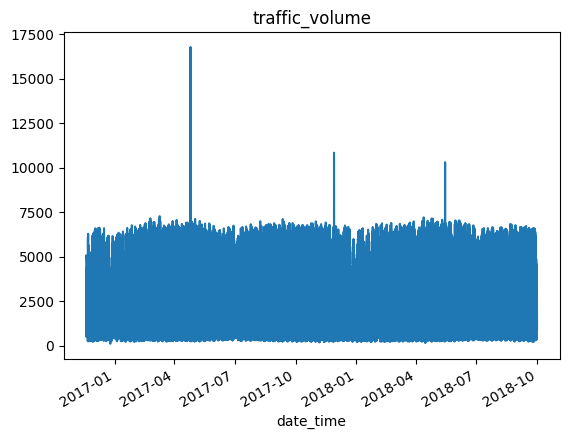

In [78]:
df['traffic_volume'].plot(title='traffic_volume')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [80]:
df.sample(5)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-03-24 06:00:00,5193.0,276.15,0.0,0.0,90,Mist,mist
2017-07-04 21:00:00,2696.0,299.95,0.0,0.0,75,Clouds,broken clouds
2018-03-16 22:00:00,3079.0,272.09,0.0,0.0,1,Clear,sky is clear
2018-05-02 01:00:00,324.0,286.42,0.0,0.0,40,Rain,moderate rain
2018-07-13 10:00:00,4392.0,295.22,0.0,0.0,90,Mist,mist


In [81]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object


In [82]:
df_encoded = pd.get_dummies(df, columns=['weather_description','weather_main'])

In [83]:
df['weather_description']=df.drop(['weather_description'] , axis=1 , inplace=True)

In [84]:
df['weather_main']=df.drop(['weather_main'], axis=1 , inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_description  0 non-null      object 
 6   weather_main         0 non-null      object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


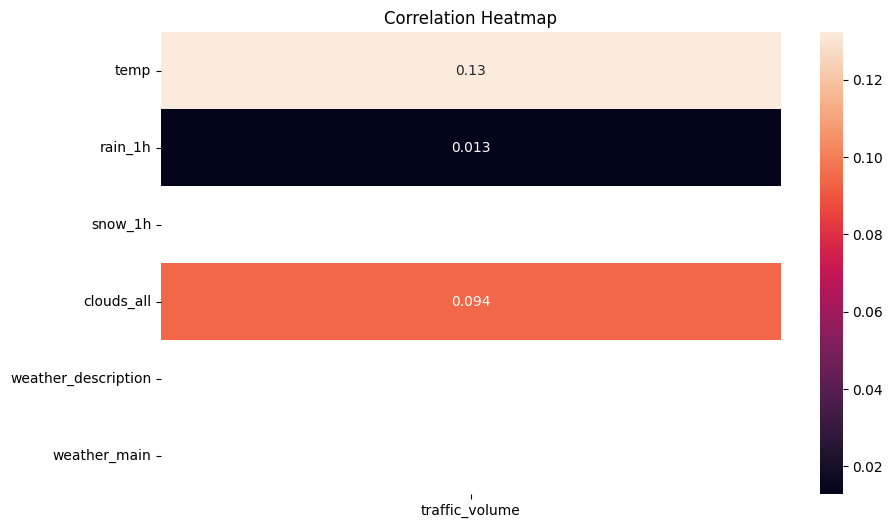

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr().loc[['traffic_volume']].drop('traffic_volume',axis=1).transpose(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [87]:
features = ['temp','rain_1h','snow_1h','clouds_all']
target = ['traffic_volume']

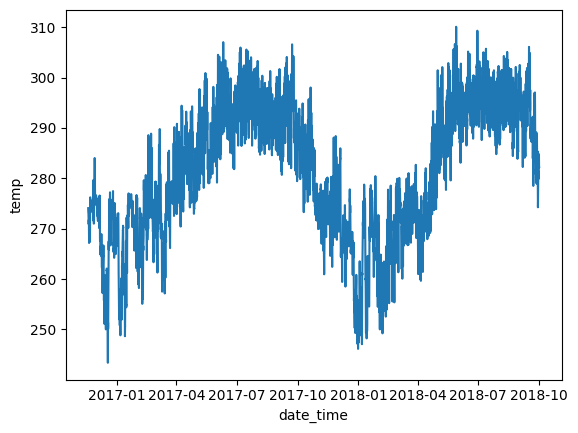

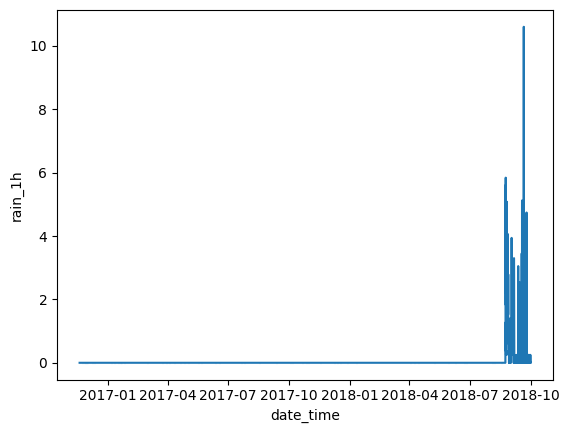

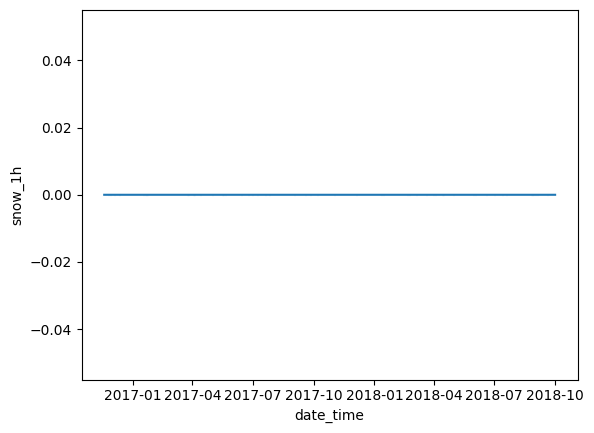

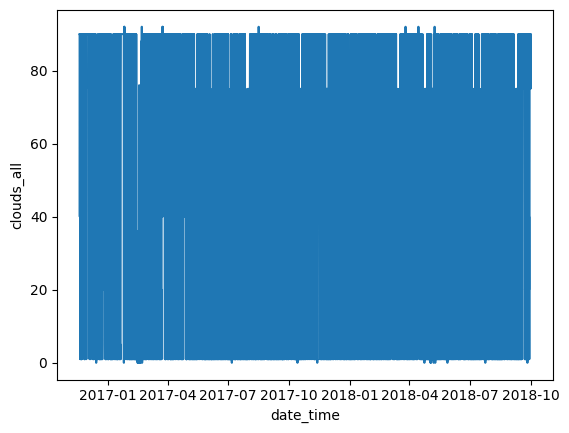

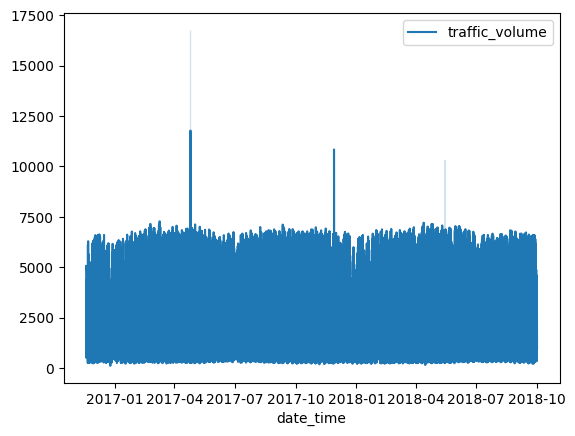

In [88]:
for feature in features:
  sns.lineplot(df[feature])
  plt.show()
sns.lineplot(df[target])
plt.show()

In [89]:
#sonw_1h column has no effect

In [90]:
df.fillna(method='bfill',inplace=True)

<ipython-input-90-71c2b11f6341>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [91]:
df.shape

(20000, 7)

In [92]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_description,20000
weather_main,20000


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [93]:
df['prev_traffic_volume'] = df['traffic_volume'].rolling(window=30).mean()

<Axes: xlabel='date_time'>

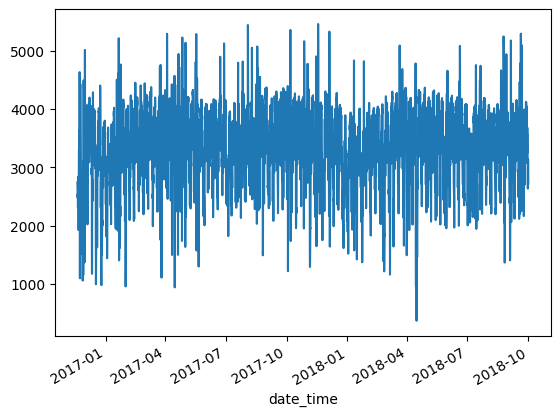

In [94]:
df['prev_traffic_volume'].plot()

In [95]:
df.fillna(method='bfill', inplace=True)

<ipython-input-95-168d8f9d469d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_description  0 non-null      object 
 6   weather_main         0 non-null      object 
 7   prev_traffic_volume  20000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [97]:
df.shape

(20000, 8)

In [98]:
df = df[['traffic_volume', 'prev_traffic_volume']]

train_data , test_data = train_test_split(df[['traffic_volume', 'prev_traffic_volume']] , test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(test_data , test_size=0.5, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [99]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_data['traffic_volume'] = target_scaler.fit_transform(train_data[['traffic_volume']])
train_data['prev_traffic_volume'] = feature_scaler.fit_transform(train_data[['prev_traffic_volume']])
val_data['traffic_volume'] = target_scaler.transform(val_data[['traffic_volume']])
val_data['prev_traffic_volume'] = feature_scaler.transform(val_data[['prev_traffic_volume']])
test_data['traffic_volume'] = target_scaler.transform(test_data[['traffic_volume']])
test_data['prev_traffic_volume'] = feature_scaler.transform(test_data[['prev_traffic_volume']])

In [100]:
train_data = train_data.values
val_data = val_data.values
test_data = test_data.values

In [101]:
win_size = 30

train_ts = timeseries_dataset_from_array(
    train_data,
    targets=train_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
    )

val_ts = timeseries_dataset_from_array(
    val_data,
    targets=val_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
    )

test_ts = timeseries_dataset_from_array(
    test_data,
    targets=test_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
    )

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [102]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=50, return_sequences=True))
RNN_model.add(Dropout(0.1))
RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dropout(0.1))
RNN_model.add(Dense(units=1))
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [103]:
RNN_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [104]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [105]:
RNN_history = RNN_model.fit(train_ts, epochs=50, validation_data=val_ts,callbacks=early_stopping)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - loss: 0.0343 - mae: 0.1279 - val_loss: 0.0015 - val_mae: 0.0286
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0035 - mae: 0.0447 - val_loss: 0.0014 - val_mae: 0.0268
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0024 - mae: 0.0367 - val_loss: 0.0014 - val_mae: 0.0258
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0021 - mae: 0.0336 - val_loss: 0.0012 - val_mae: 0.0253
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0019 - mae: 0.0320 - val_loss: 0.0013 - val_mae: 0.0267
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0018 - mae: 0.0308 - val_loss: 0.0012 - val_mae: 0.0260
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0017 - mae: 0.0297 - val_loss: 0.0012 - val_mae: 0.0263
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0017 - mae: 0.0290 - val_loss: 0.0012 - val_mae: 0.0260
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [106]:
rnn_predictions = RNN_model.predict(train_ts)
rnn_predictions_test = RNN_model.predict(test_ts)
rnn_predictions_val = RNN_model.predict(val_ts)

500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [115]:
print(f'MAE: {mean_absolute_error(test_data[win_size:,0], rnn_predictions_test.flatten())}')

MAE: 0.025070888354147912


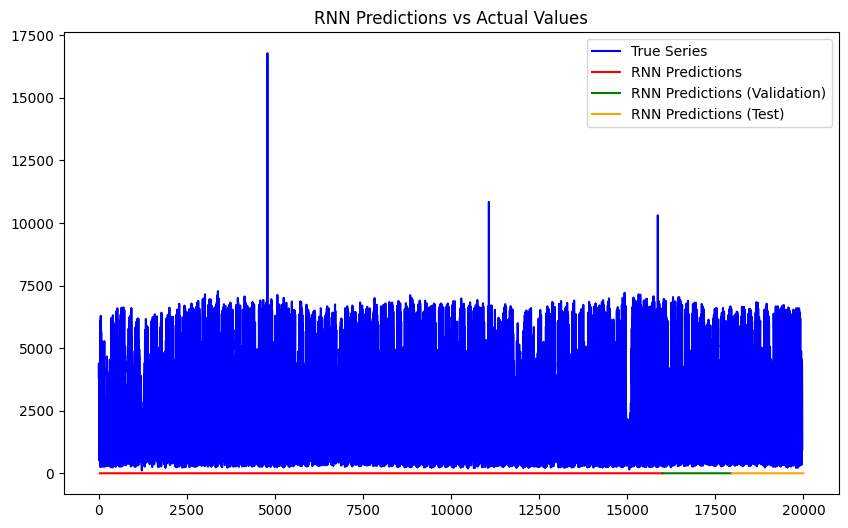

In [108]:
rnn_arr = np.zeros(len(df))
rnn_arr[:win_size] = np.nan

rnn_arr[win_size:len(rnn_predictions)+win_size] = rnn_predictions.flatten()
rnn_arr[len(rnn_predictions)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+win_size] = rnn_predictions_val.flatten()
rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+len(rnn_predictions_test)+win_size] = rnn_predictions_test.flatten()

plt.figure(figsize=(10, 6))
plt.plot(df.iloc[win_size:,0].values, label='True Series',color='blue')
plt.plot(rnn_arr[:len(rnn_predictions)+win_size], label='RNN Predictions', color='red')
plt.plot(np.arange(len(rnn_predictions)+win_size, len(rnn_predictions)+len(rnn_predictions_val)+win_size),
         rnn_arr[len(rnn_predictions)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+win_size],
         label='RNN Predictions (Validation)', color='green')
plt.plot(np.arange(len(rnn_predictions)+len(rnn_predictions_val)+win_size, len(rnn_arr)),
         rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+win_size:],
         label='RNN Predictions (Test)', color='orange')

plt.legend()
plt.title('RNN Predictions vs Actual Values')
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [109]:
GRU_model = Sequential()
GRU_model.add(GRU(units=50))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(units=1))
GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [110]:
GRU_history = GRU_model.fit(train_ts, epochs=20, validation_data=val_ts,callbacks=early_stopping)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0067 - mae: 0.0632 - val_loss: 0.0016 - val_mae: 0.0297
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.0020 - mae: 0.0320 - val_loss: 0.0013 - val_mae: 0.0265
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0017 - mae: 0.0294 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 0.0016 - mae: 0.0285 - val_loss: 0.0012 - val_mae: 0.0255
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 0.0016 - mae: 0.0282 - val_loss: 0.0012 - val_mae: 0.0257


In [111]:
GRU_predictions = GRU_model.predict(train_ts)
GRU_predictions_test = GRU_model.predict(test_ts)
GRU_predictions_val = GRU_model.predict(val_ts)

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [116]:
print(f'MAE: {mean_absolute_error(test_data[win_size:,0], GRU_predictions_test.flatten())}')

MAE: 0.029772295390199762


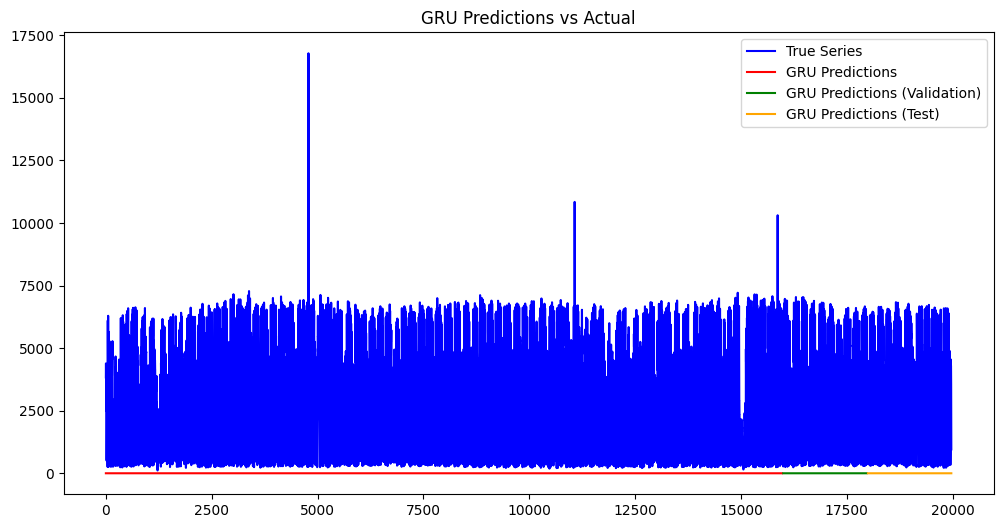

In [113]:
GRU_arr = np.zeros(len(df))
GRU_arr[:win_size] = np.nan

GRU_arr[win_size:len(GRU_predictions)+win_size] = GRU_predictions.flatten()
GRU_arr[len(GRU_predictions)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+win_size] = GRU_predictions_val.flatten()
GRU_arr[len(GRU_predictions)+len(GRU_predictions_val)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+len(GRU_predictions_test)+win_size] = GRU_predictions_test.flatten()

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[win_size:,0].values, label='True Series',color='blue')
plt.plot(GRU_arr[win_size:len(GRU_predictions)+win_size], label='GRU Predictions', color='red')
plt.plot(np.arange(len(GRU_predictions)+win_size, len(GRU_predictions)+len(GRU_predictions_val)+win_size),
         GRU_arr[len(GRU_predictions)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+win_size],
         label='GRU Predictions (Validation)', color='green')
plt.plot(np.arange(len(GRU_predictions)+len(GRU_predictions_val)+win_size+30, len(GRU_arr)-30),
         GRU_arr[len(GRU_predictions)+len(GRU_predictions_val)+win_size:-60],
         label='GRU Predictions (Test)', color='orange')

plt.legend()
plt.title('GRU Predictions vs Actual')
plt.show()

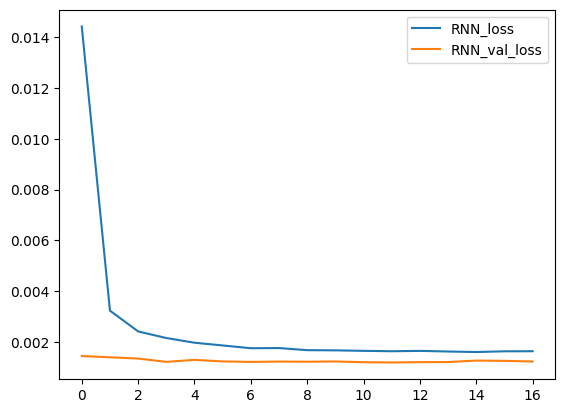

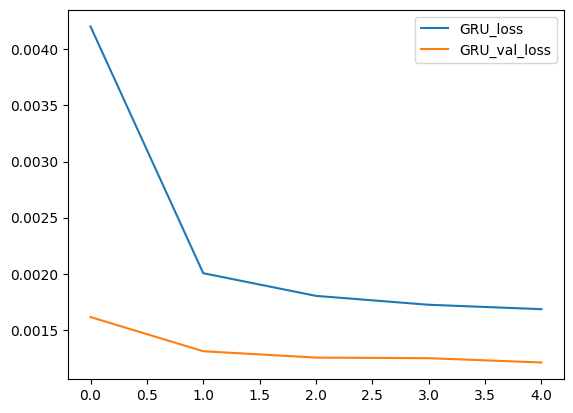

In [114]:
#Loss and the validation loss for RNN model
plt.plot(RNN_history.history['loss'],label='RNN_loss')
plt.plot(RNN_history.history['val_loss'],label='RNN_val_loss')
plt.legend()
plt.show()

#Loss and the validation loss for GRU model
plt.plot(GRU_history.history['loss'],label='GRU_loss')
plt.plot(GRU_history.history['val_loss'],label='GRU_val_loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1. Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?

I tried to minimize the outliers but it didn't give the result as same as i want by using z-score, so I handle the missing valuse by using (fillna) function.

2. Feature Engineering: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.

I use encoded to transform the objects valuse to numric values.

3. Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
I add droup out layers and early stopping function to try to get the best accurate relsut but i didnot.


4. Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
In the RNN model I use 50 number of ephochs , in the GRU I use 20 number of epochs. The optimizer I used adam in both since they tech us adam is the best optimizer.

5. Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?

I choose MAE to calculate.

6. Model Tuning (If Done): Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?

7. Overfitting and Underfitting: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

my results was not to accurate.
8. Future Improvements: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

I belivie that I use and evalute the model correctly but the predict part is not working with me, maybe the outliers problem affect that. My potential imporvements for my results is the train the models more until I reach an accaptable results.